## Moran Matrix and splot

In [1]:
import libpysal.api as lp
from libpysal import examples
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
% matplotlib inline

### Example 1: lists

In [2]:
f = lp.open(lp.get_path("sids2.dbf"))

varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']
vars = [np.array(f.by_col[var]) for var in varnames]

w = lp.open(lp.get_path("sids2.gal")).read()

from esda.moran import Moran_BV_matrix
res = Moran_BV_matrix(vars,  w,  varnames = varnames)

In [3]:
res

{(0, 1): <esda.moran.Moran_BV at 0x122a4c278>,
 (1, 0): <esda.moran.Moran_BV at 0x122a4c7b8>,
 (0, 2): <esda.moran.Moran_BV at 0x122a4c780>,
 (2, 0): <esda.moran.Moran_BV at 0x122a5cb00>,
 (0, 3): <esda.moran.Moran_BV at 0x122f99e80>,
 (3, 0): <esda.moran.Moran_BV at 0x122a5cc18>,
 (1, 2): <esda.moran.Moran_BV at 0x122a5ca90>,
 (2, 1): <esda.moran.Moran_BV at 0x122a5cbe0>,
 (1, 3): <esda.moran.Moran_BV at 0x122f86978>,
 (3, 1): <esda.moran.Moran_BV at 0x122f86e80>,
 (2, 3): <esda.moran.Moran_BV at 0x122f86eb8>,
 (3, 2): <esda.moran.Moran_BV at 0x122f86ef0>}

In [4]:
from splot.esda import moran_facette

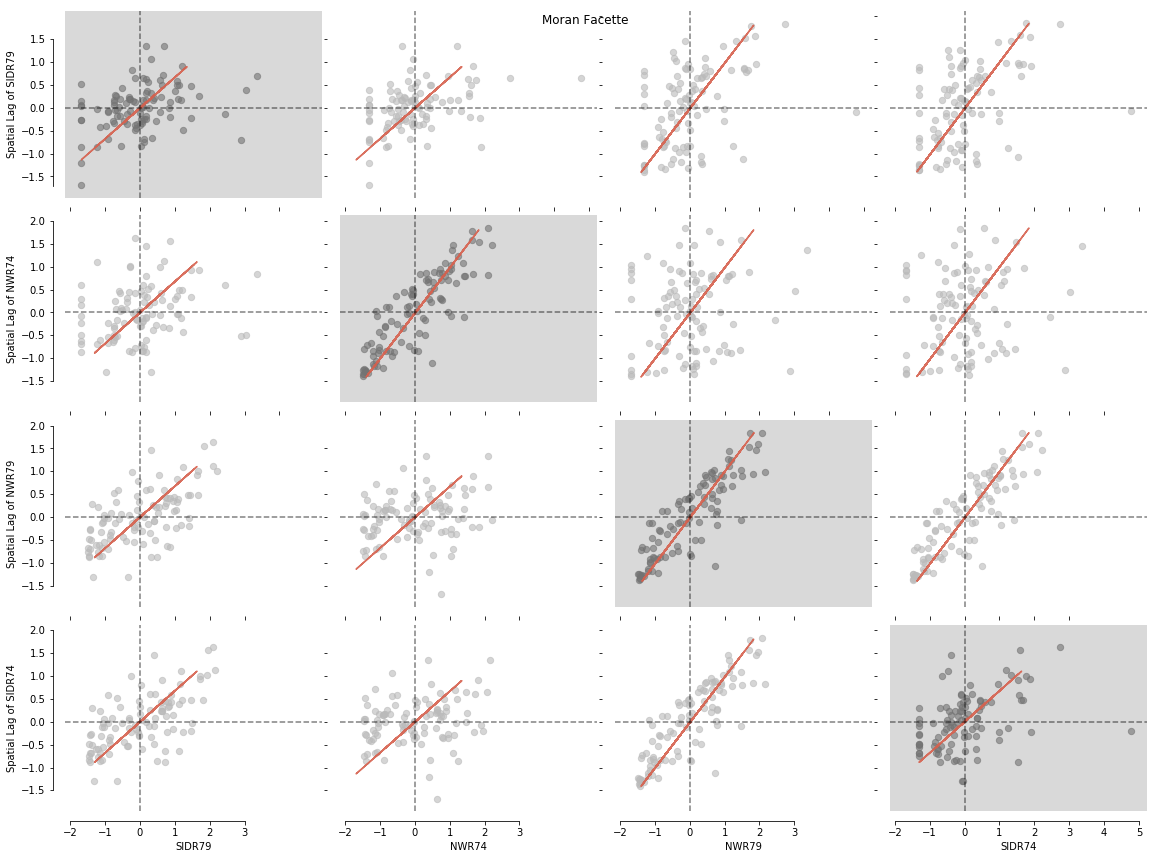

In [5]:
moran_facette(res)
plt.show()

### Example 2: df

In [6]:
path = examples.get_path('columbus.shp')

In [7]:
gdf = gpd.read_file(path)
variables2 = gdf[['HOVAL', 'CRIME', 'INC', 'EW']]
variables2.head()

,HOVAL,CRIME,INC,EW
0,80.467003,15.725980,19.531,1.0
1,44.567001,18.801754,21.232,0.0
2,26.350000,30.626781,15.956,1.0
3,33.200001,32.387760,4.477,0.0
4,23.225000,50.731510,11.252,1.0


In [8]:
variables2.shape

(49, 4)

In [9]:
w2 = lp.queen_from_shapefile(path)

In [13]:
matrix = Moran_BV_matrix(variables2, w2)
matrix

{(0, 1): <esda.moran.Moran_BV at 0x126053b70>,
 (1, 0): <esda.moran.Moran_BV at 0x125fc2358>,
 (0, 2): <esda.moran.Moran_BV at 0x125fc27b8>,
 (2, 0): <esda.moran.Moran_BV at 0x126053780>,
 (0, 3): <esda.moran.Moran_BV at 0x1260537b8>,
 (3, 0): <esda.moran.Moran_BV at 0x126053208>,
 (1, 2): <esda.moran.Moran_BV at 0x126053a90>,
 (2, 1): <esda.moran.Moran_BV at 0x126053518>,
 (1, 3): <esda.moran.Moran_BV at 0x126053588>,
 (3, 1): <esda.moran.Moran_BV at 0x126053898>,
 (2, 3): <esda.moran.Moran_BV at 0x126053748>,
 (3, 2): <esda.moran.Moran_BV at 0x126053b00>}

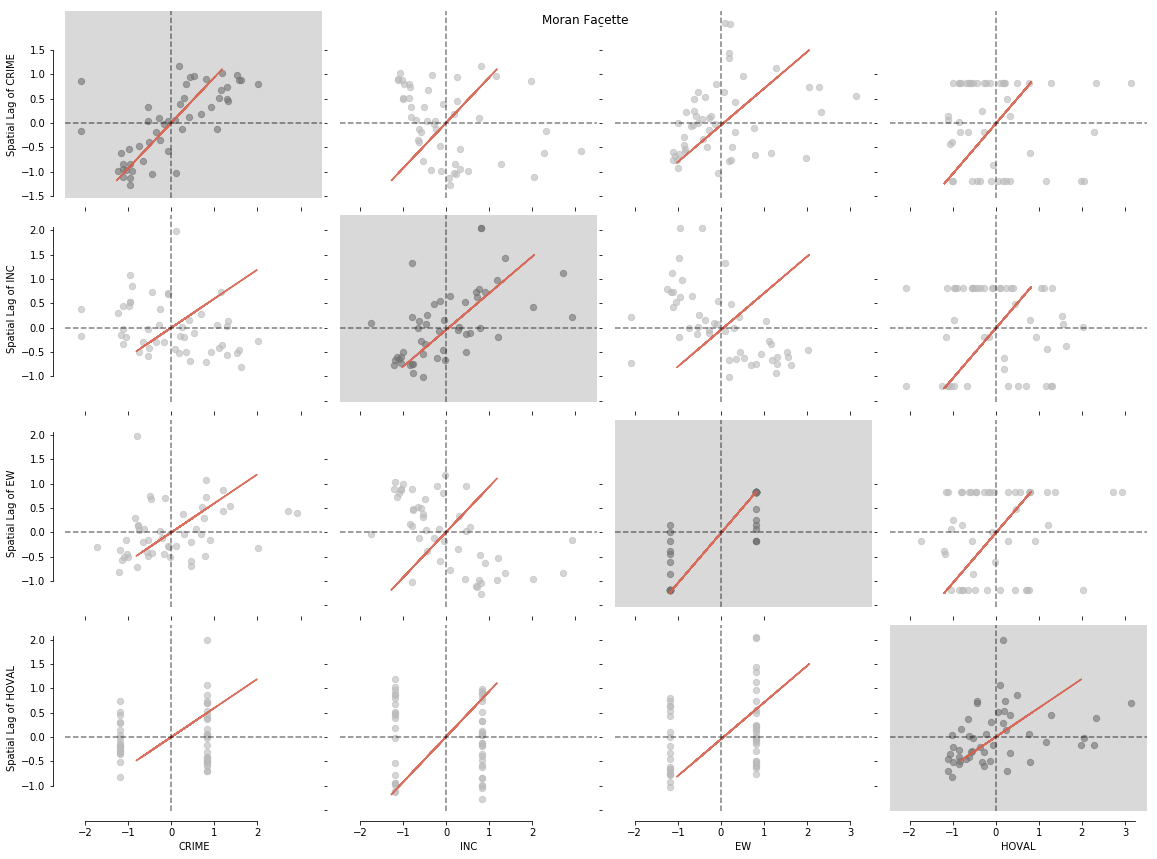

In [15]:
moran_facette(matrix)
plt.show()